In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
data = pd.read_csv("new_loan_data.csv") 
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(data.shape)       # number of rows and columns
print(data.columns)     # column names
print(data.info())      # data types and missing values
print(data.describe())  # summary statistics for numerical columns


(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Are

In [4]:
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(include='object').columns


In [5]:
# Numerical columns → fill with mean
for col in num_cols:
    data[col] = data[col].fillna(data[col].mean())

# Categorical columns → fill with mode
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


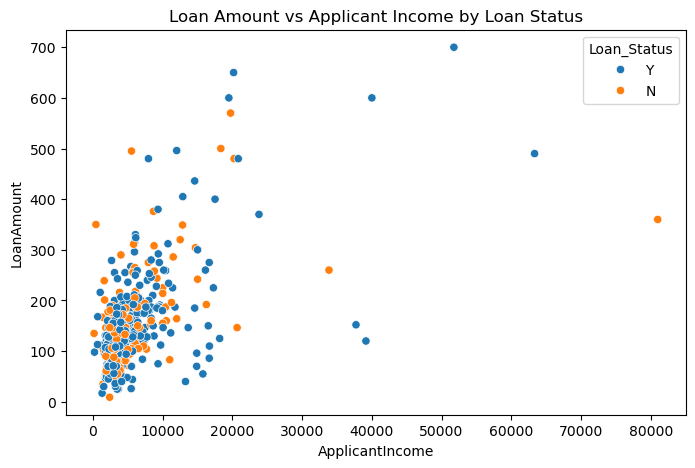

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=data)
plt.title("Loan Amount vs Applicant Income by Loan Status")
plt.show()


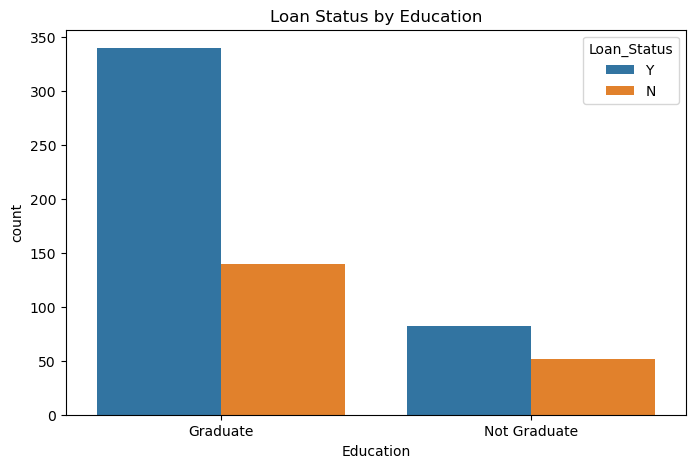

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='Education', hue='Loan_Status', data=data)
plt.title("Loan Status by Education")
plt.show()


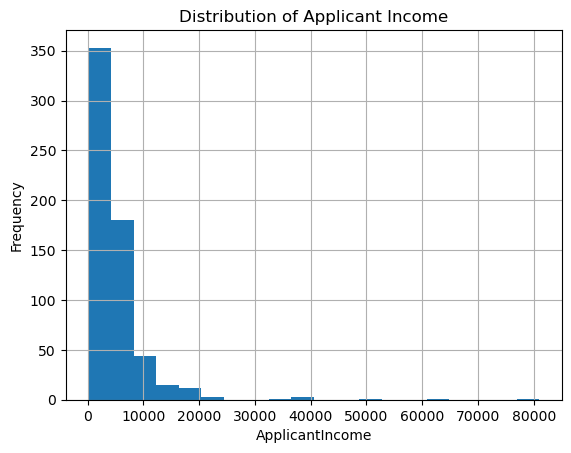

In [8]:
data['ApplicantIncome'].hist(bins=20)
plt.title("Distribution of Applicant Income")
plt.xlabel("ApplicantIncome")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data)
plt.title("Loan Amount Spread by Loan Status")
plt.show()


In [17]:
le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])


X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)  # features
y = data['Loan_Status']                             # target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [22]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7837837837837838
Confusion Matrix:
 [[ 27  38]
 [  2 118]]


In [21]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)  # increase iterations
model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


###  Interpretation

The Logistic Regression model was trained with L2 regularization (`penalty='l2'`) using the 'lbfgs' solver and a maximum of 5000 iterations to ensure convergence. The model achieved an accuracy of approximately 78%, meaning it correctly predicted the loan status for most applicants in the test set.

The confusion matrix shows the detailed prediction results:

|             | Predicted No | Predicted Yes |
|-------------|--------------|---------------|
| Actual No   | 27           | 38            |
| Actual Yes  | 2            | 118           |

- **True Negatives (27):** The model correctly predicted 27 applicants who were not approved for a loan.  
- **False Positives (38):** The model incorrectly predicted 38 applicants as approved when they were not.  
- **False Negatives (2):** Only 2 applicants were incorrectly predicted as not approved when they actually received a loan.  
- **True Positives (118):** The model correctly predicted 118 applicants who were approved for a loan.

Overall, the model is very effective at identifying applicants likely to be approved, with only a small number of misclassifications. The high number of True Positives and low False Negatives indicate the model is particularly reliable at predicting loan approvals.  

From the exploratory data analysis, we also observed that applicants with higher incomes or graduates have a higher probability of loan approval, which aligns with the model’s predictions and confirms its practical usefulness for credit risk prediction.
